In [1]:
%pylab inline
from numpy.lib.recfunctions import *

data = load("pairs_with_truths.npz")['arr_0']
data = append_fields(data, 'full_pair_id', [], dtypes='<f8')
data['full_pair_id'] = data['pair'] + data['rung'] * 10000 + data['tdc'] * 100000
pair_ids = unique(data['full_pair_id'])



Populating the interactive namespace from numpy and matplotlib


In [55]:
modes = ('valid', 'same', 'full')
names = ['corr_%s_std' % mode for mode in modes] + ['corr_%s_mean' % mode for mode in modes] + ['corr_%s_median' % mode for mode in modes]
pairs = zeros(len(pair_ids), dtype=[('pair_id', 'f4'), ('dt', 'f4')] + [(name, 'f4') for name in names])
for idx, pair_id in enumerate(pair_ids):
    pair = data[data['full_pair_id'] == pair_id]
    pairs[idx]['dt'] = pair['dt'][0]
    pairs[idx]['pair_id'] = pair_id
    for mode in modes:
        corr = correlate(pair['lcA'], pair['lcB'], mode=mode)
        pairs[idx]['corr_%s_std' % mode] = std(corr)
        pairs[idx]['corr_%s_mean' % mode] = mean(corr)
        pairs[idx]['corr_%s_median' % mode] = median(corr)


In [56]:
savez("pair_correlation_features", pairs)

dt, full median, full std


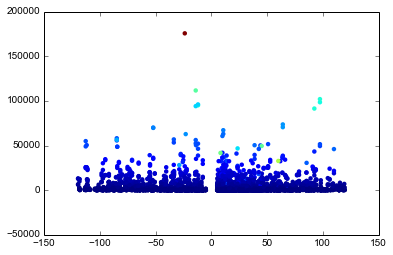

full median, full std, dt


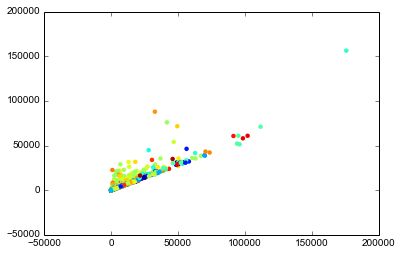

full mean, full std, dt


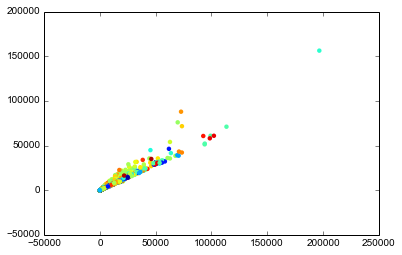

same median, same std, dt


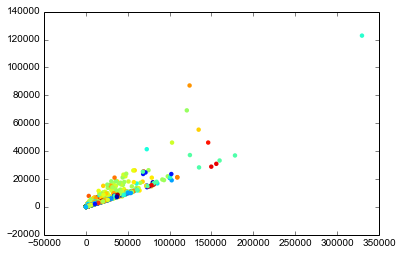

same mean, same std, dt


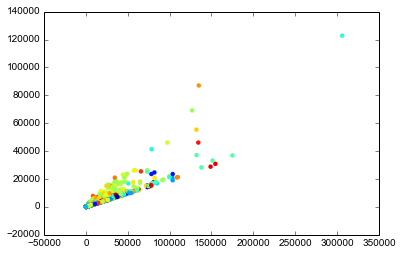

In [70]:
print "dt, full median, full std"
scatter(pairs['dt'], pairs['corr_full_median'], c=pairs['corr_full_std'], marker='o', edgecolor='None'); show()
print "full median, full std, dt"
scatter(pairs['corr_full_median'], pairs['corr_full_std'], c=pairs['dt'], marker='o', edgecolor='None'); show()
print "full mean, full std, dt"
scatter(pairs['corr_full_mean'], pairs['corr_full_std'], c=pairs['dt'], marker='o', edgecolor='None'); show()
print "same median, same std, dt"
scatter(pairs['corr_same_median'], pairs['corr_same_std'], c=pairs['dt'], marker='o', edgecolor='None'); show()
print "same mean, same std, dt"
scatter(pairs['corr_same_mean'], pairs['corr_same_std'], c=pairs['dt'], marker='o', edgecolor='None'); show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
